In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection

X = pd.read_excel("data/chapter08.xlsx")
X.head()

,年齢,閲覧時間,気温,収入,貯金,距離,体力,購入
0,45.210958,10.764374,12.992434,95.145725,312.965664,230.967737,0.307814,3
1,48.304713,9.991882,13.384344,95.979897,217.256494,293.644613,0.304630,3
2,10.430748,3.004812,-2.174604,574.678933,394.703952,1361.523125,0.469096,2
3,11.995386,3.939633,-3.248838,548.393921,222.727635,1483.626253,0.514231,2
4,56.450739,20.255405,5.327741,548.955093,47.404814,901.551002,0.180821,1


In [3]:
X.shape

(350, 8)

In [4]:
X.isnull().sum()

年齢      0
閲覧時間    0
気温      0
収入      0
貯金      0
距離      0
体力      0
購入      0
dtype: int64

In [5]:
y = X["購入"]
X2 = X.copy().drop("購入", axis=1)

[
    X_train,
    X_test,
    y_train,
    y_test
] = sklearn.model_selection.train_test_split(
    X2, y, random_state=0
)

model_rf = RandomForestClassifier(
    max_depth=4, 
    random_state=0
)

model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [6]:
score_te = model_rf.score(X_test, y_test)
print("正解率", score_te * 100, "%")

正解率 85.22727272727273 %


In [7]:
score_tr = model_rf.score(X_train, y_train)
print("正解率", score_tr * 100, "%")

正解率 88.16793893129771 %


In [8]:
y_test_pred = model_rf.predict(X_test)

test_results = pd.DataFrame({
    "y_test": y_test,
    "y予想": y_test_pred
})
test_results.head()

,y_test,y予想
6,2,2
52,1,1
270,0,0
45,0,0
296,1,1


In [9]:
test_results_all = pd.concat(
    [X_test, test_results],
    axis=1
)
test_results_all.head()

,年齢,閲覧時間,気温,収入,貯金,距離,体力,y_test,y予想
6,7.781821,3.273927,-3.771747,589.406444,501.421859,1387.758611,0.919575,2,2
52,47.432016,19.741129,5.538893,503.494016,133.617105,1080.962982,0.423169,1,1
270,51.619048,18.406166,11.172757,419.277380,-2.170512,1069.673027,-1.291702,0,0
45,29.844858,14.661502,10.201981,325.597971,-1.048139,874.472685,-1.885874,0,0
296,4.708948,19.849701,9.985220,443.550173,-70.302979,1018.944861,-1.108502,1,1


Text(0.5, 0, '寄与')

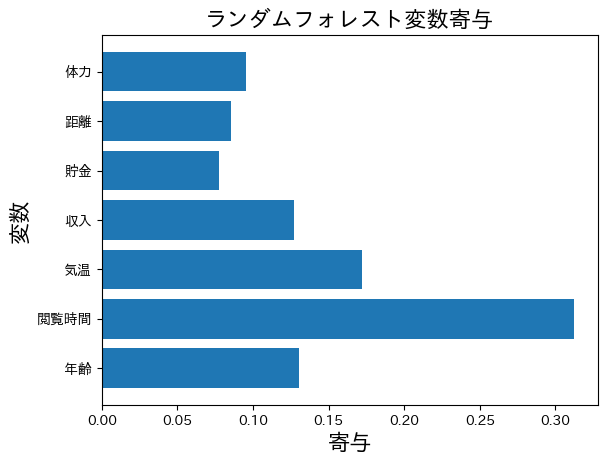

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

model_rf.fit(X_train, y_train)

plt.barh(X2.columns, model_rf.feature_importances_)

plt.title("ランダムフォレスト変数寄与", fontsize=16)
plt.ylabel("変数", fontsize=16)
plt.xlabel("寄与", fontsize=16)

Text(0.5, 0, '寄与')

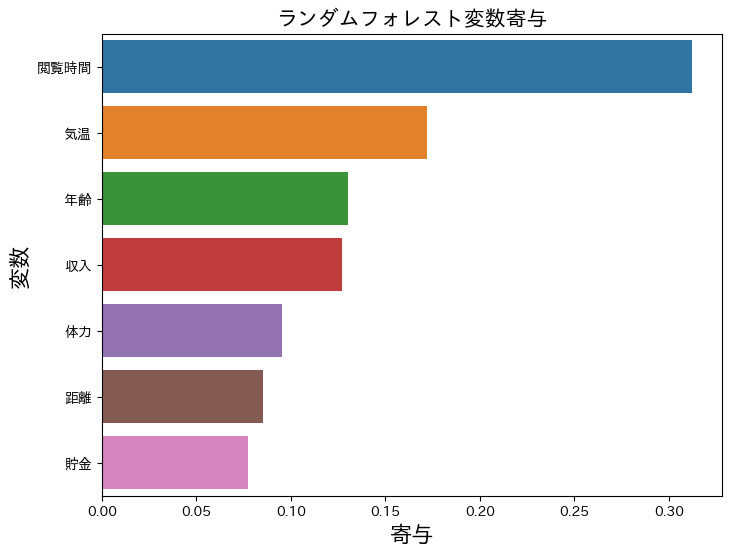

In [11]:
model_rf.fit(X_train, y_train)

# ステップ1
rf_imp = pd.DataFrame({
    "寄与": model_rf.feature_importances_,
    "変数": X2.columns,
})
rf_imp = rf_imp.sort_values(by="寄与", ascending=False)

# ステップ2
plt.figure(figsize=(8, 6))
sns.barplot(
    x="寄与",
    y="変数",
    data=rf_imp,
    hue="変数",
    dodge=False,
)
plt.title("ランダムフォレスト変数寄与", fontsize=15)
plt.ylabel("変数", fontsize=16)
plt.xlabel("寄与", fontsize=16)